In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import tkinter as tk
import missingno as msno
from sklearn.feature_selection import VarianceThreshold
import pydot
import graphviz

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\memoire\data.csv', encoding='ISO-8859-1')

In [3]:
np.shape(df)

(5644, 111)

In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

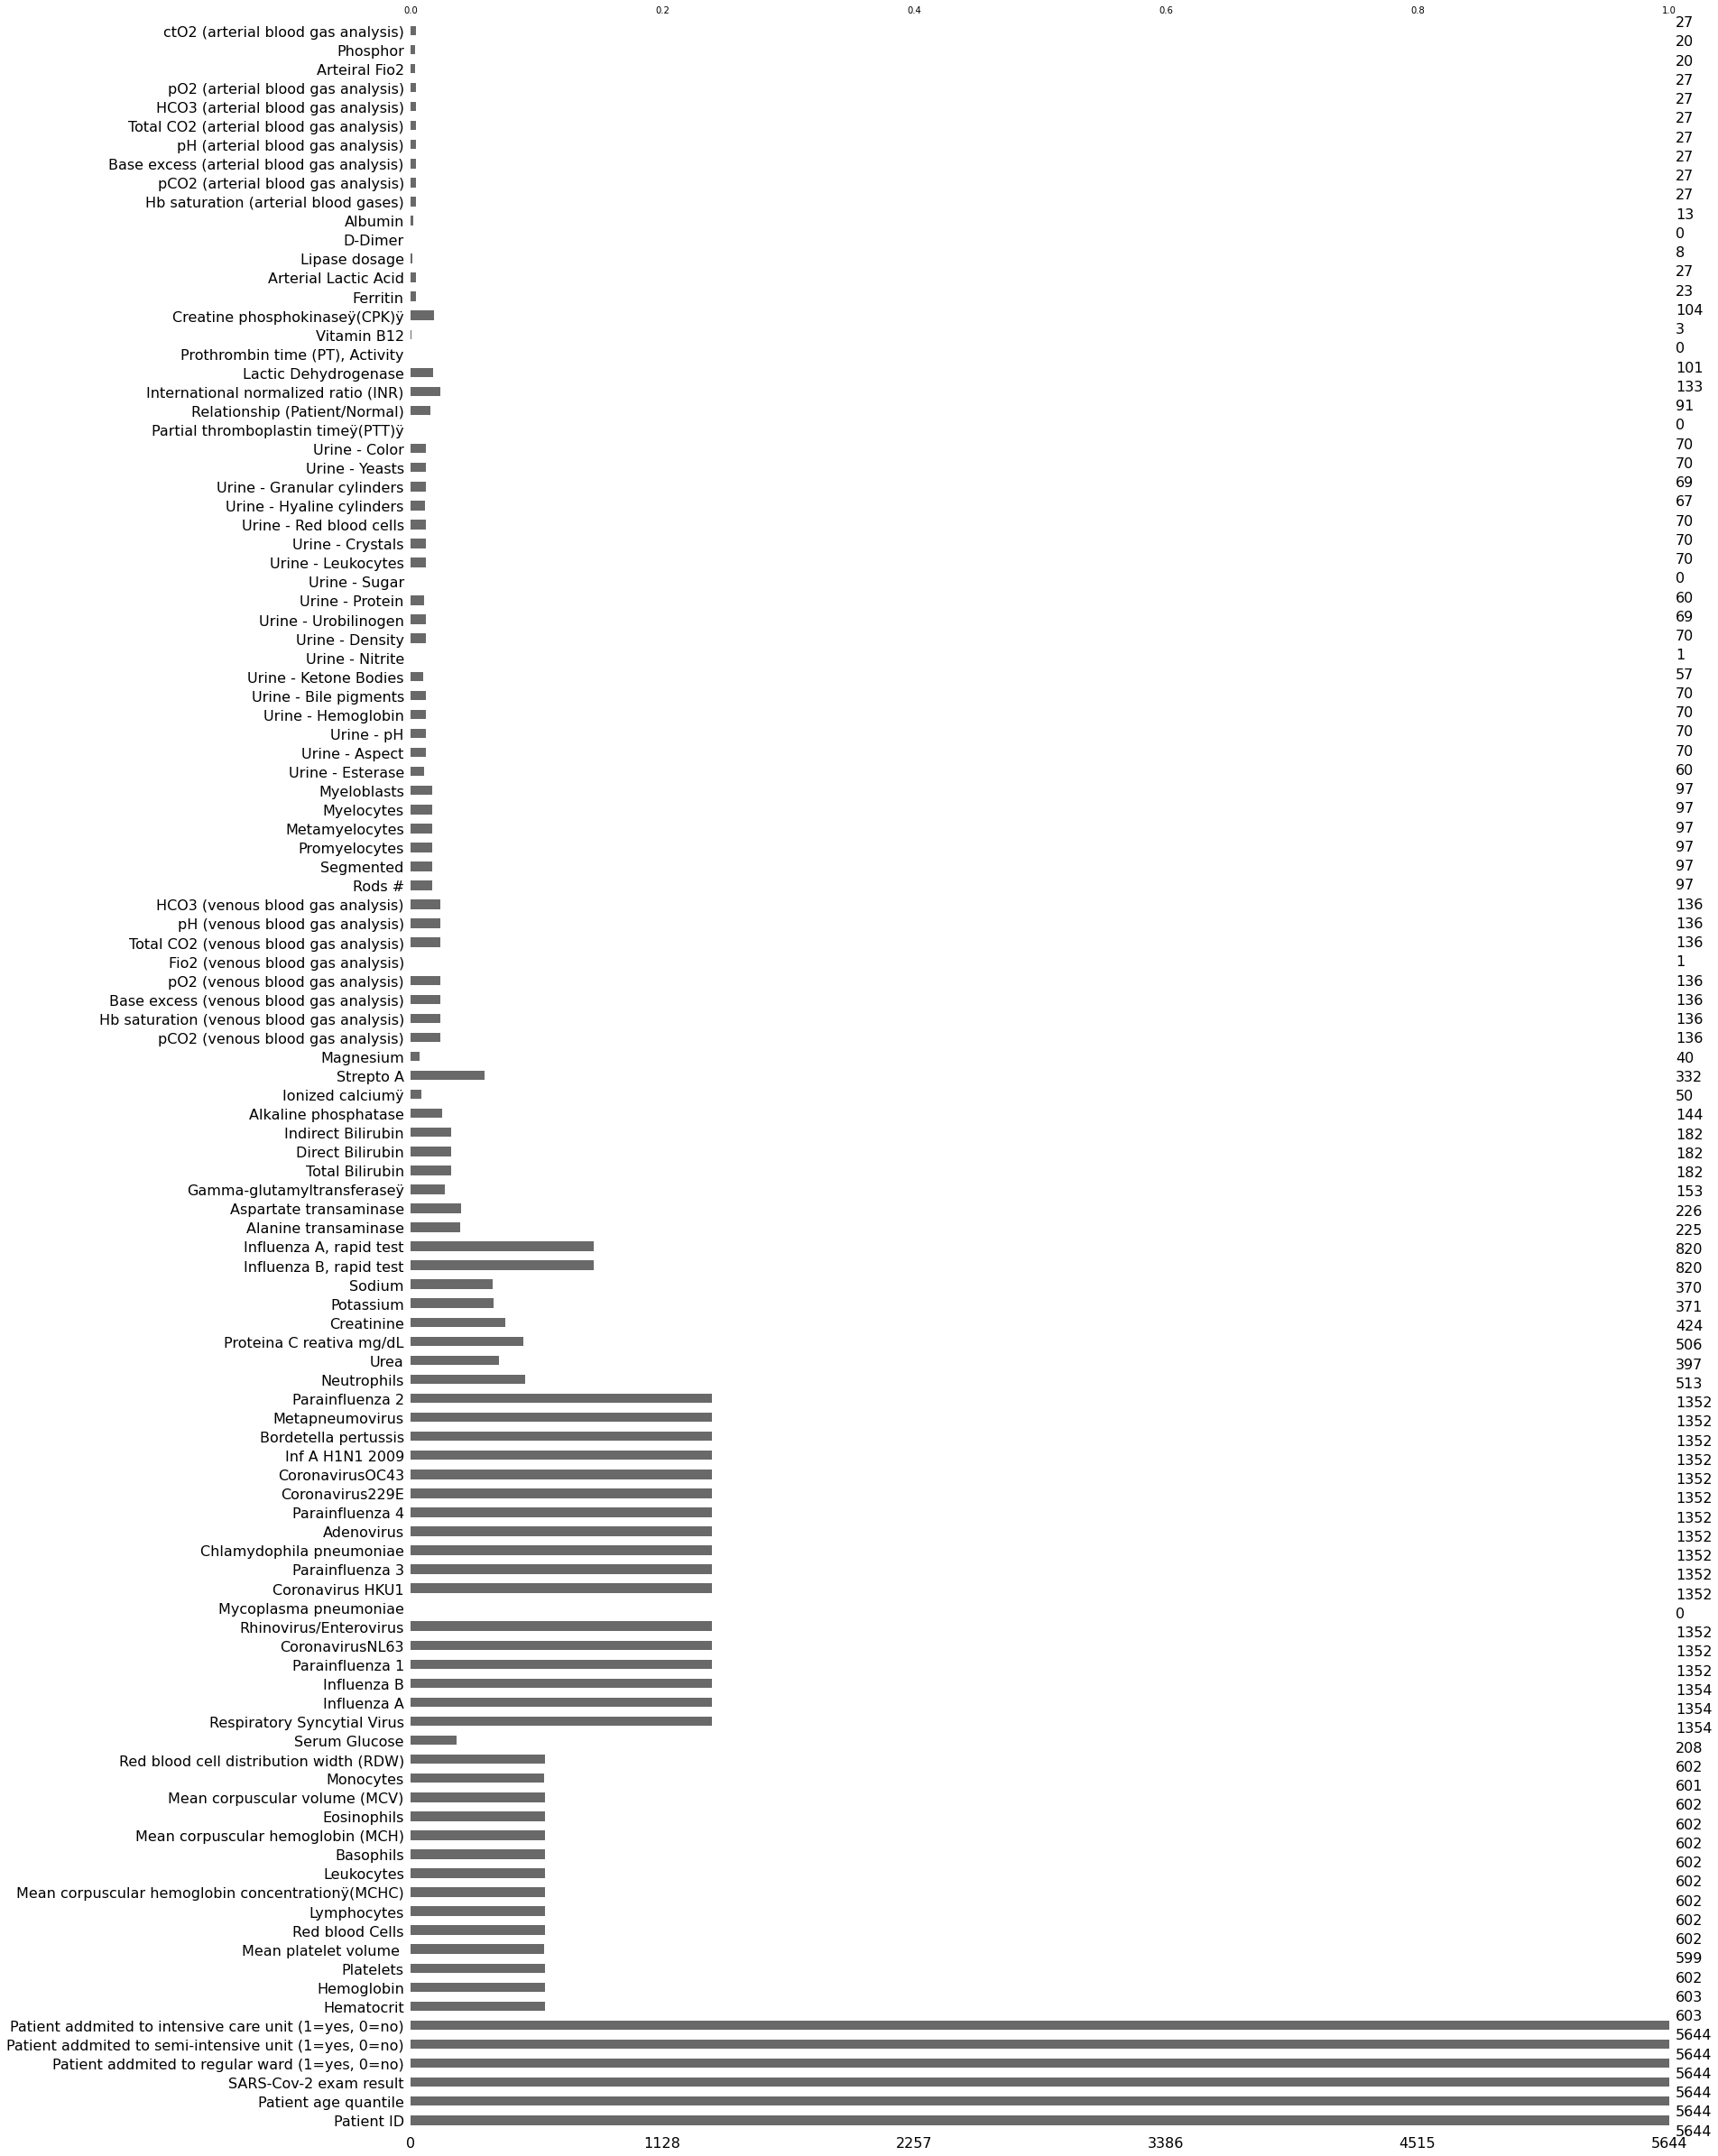

In [5]:
msno.bar(df)

In [6]:
dfNAN=df[df.columns[df.isna().sum() > 5045]]
dfNAN.info(null_counts=True , verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 72 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Serum Glucose                              208 non-null    float64
 1   Mycoplasma pneumoniae                      0 non-null      float64
 2   Neutrophils                                513 non-null    float64
 3   Urea                                       397 non-null    float64
 4   Proteina C reativa mg/dL                   506 non-null    float64
 5   Creatinine                                 424 non-null    float64
 6   Potassium                                  371 non-null    float64
 7   Sodium                                     370 non-null    float64
 8   Alanine transaminase                       225 non-null    float64
 9   Aspartate transaminase                     226 non-null    float64
 10  Gamma-glutamyltransferas

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [5]:
df=df[df.columns[df.isna().sum() < 5045]]


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             603 non-null    float64
 7   Hemoglobin                                             603 non-null    float64
 8   Platelets                                       

<AxesSubplot:>

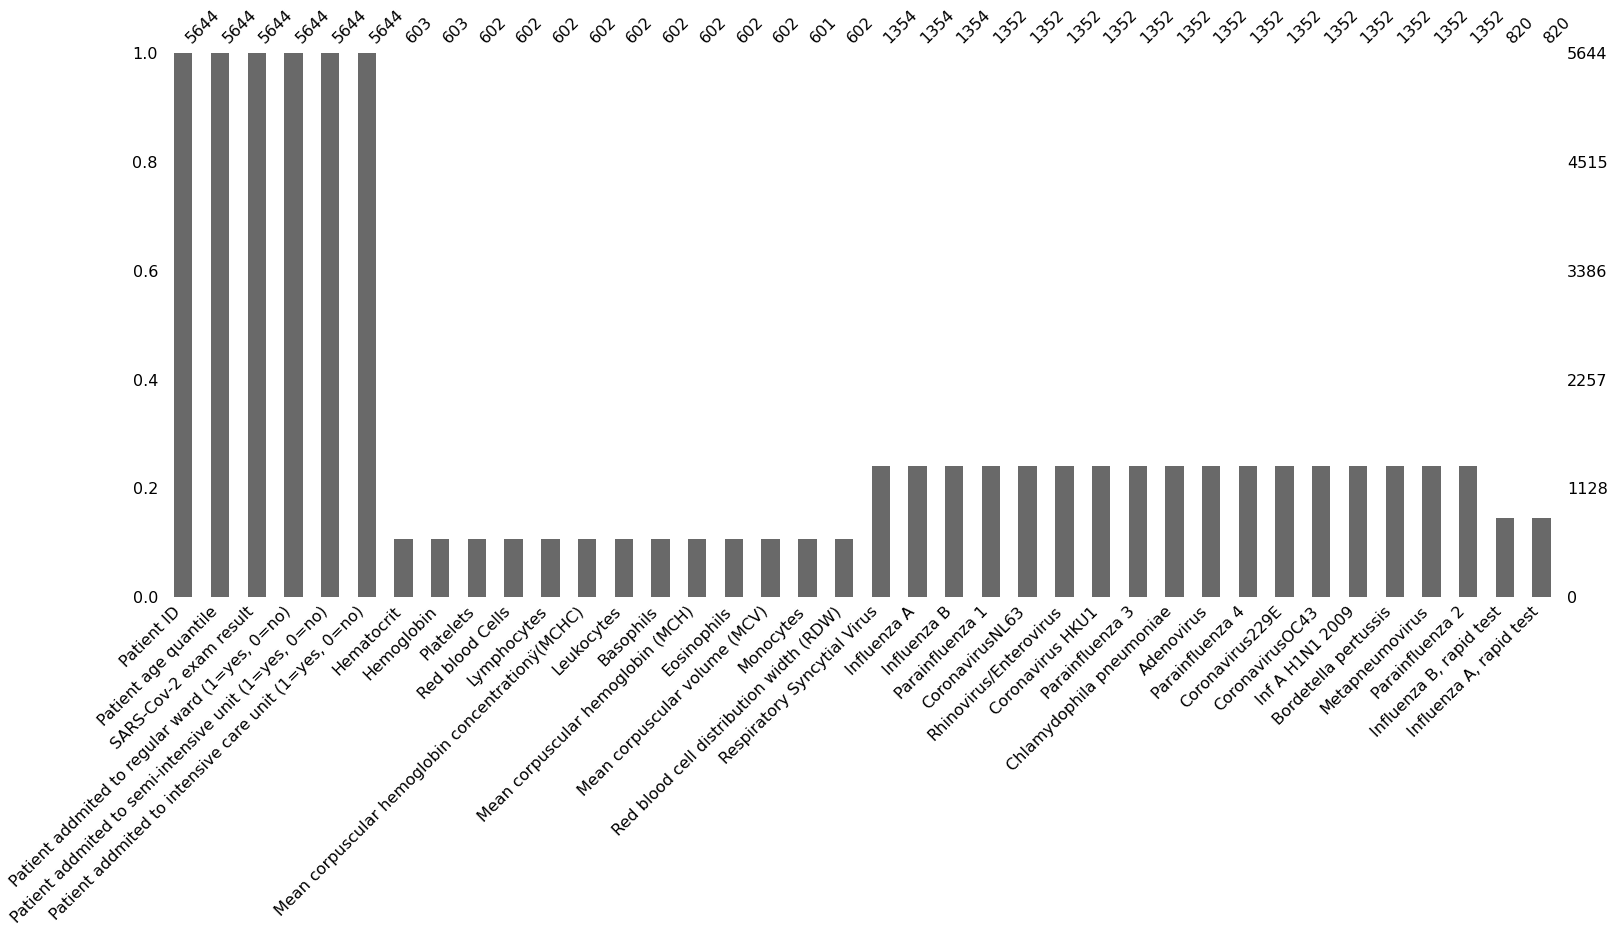

In [9]:
msno.bar(df)

In [9]:
np.shape(df)

(5644, 38)

In [11]:
#les variables et leurs types
df.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   Patient ID                                             object 
 1   Patient age quantile                                   int64  
 2   SARS-Cov-2 exam result                                 object 
 3   Patient addmited to regular ward (1=yes, 0=no)         int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  int64  
 6   Hematocrit                                             float64
 7   Hemoglobin                                             float64
 8   Platelets                                              float64
 9   Red blood Cells                                        float64
 10  Lymphocytes                                            float64
 11  Mean

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [12]:
df.dtypes.value_counts()

object     21
float64    13
int64       4
dtype: int64

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Patient ID---------------------------------------- ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus--

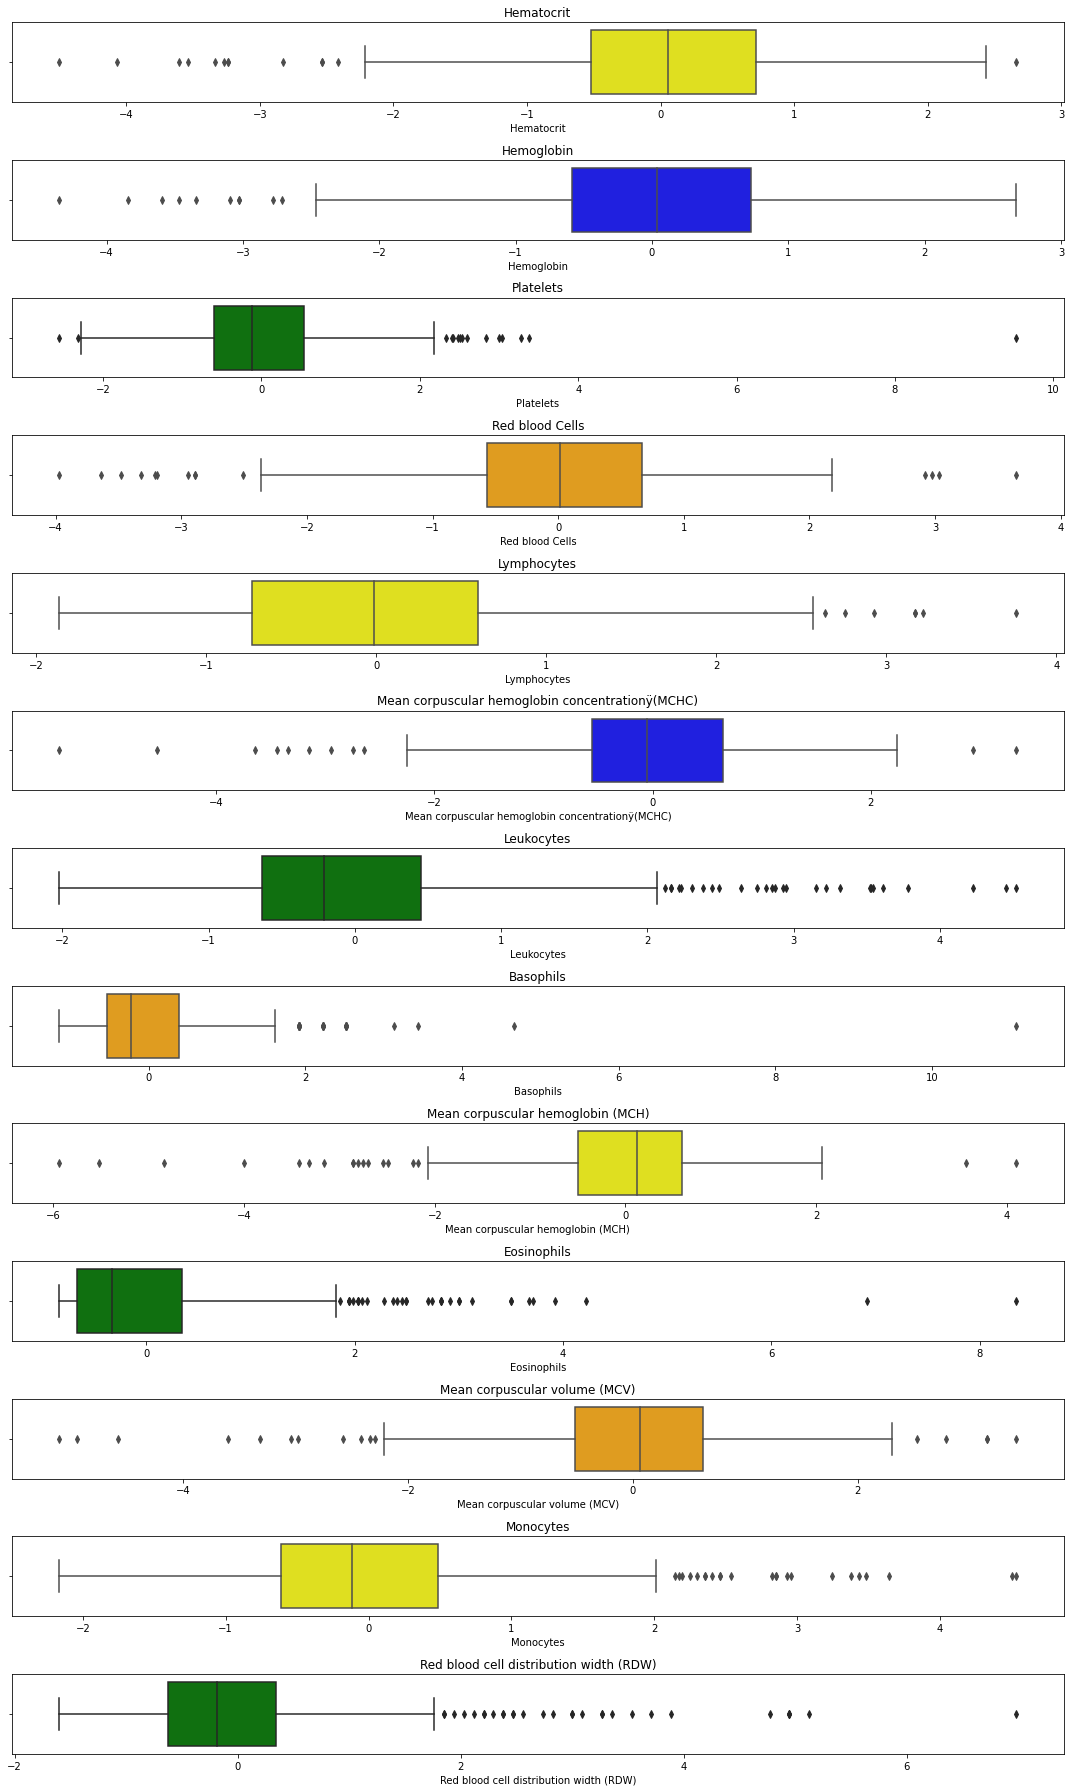

In [14]:
numeric_cols = df.select_dtypes(include=['float64'])

# Liste des couleurs pour les boîtes (une couleur par variable)
colors = ['yellow', 'blue', 'green', 'orange','yellow', 'blue', 'green', 'orange','yellow', 'green', 'orange','yellow', 'green', 'orange','yellow', 'green', 'orange','yellow', 'green', 'orange','yellow']

# Créez une figure avec plusieurs sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), figsize=(15, 25))

# Parcourez chaque colonne numérique et créez le diagramme de boîte à moustaches correspondant avec la couleur appropriée
for i, (col, color) in enumerate(zip(numeric_cols.columns, colors)):
    sns.boxplot(x=df[col], ax=axes[i], color=color)
    axes[i].set_title(col)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez le diagramme de boîte à moustaches
plt.show()


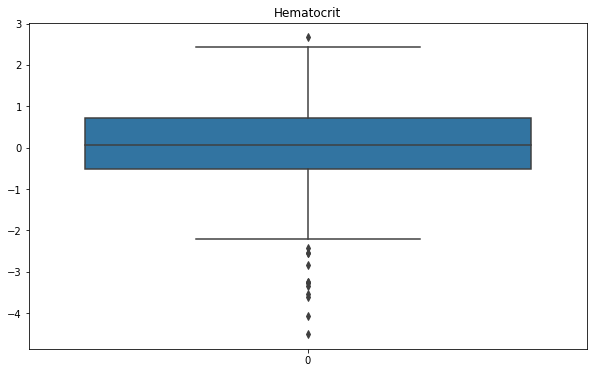

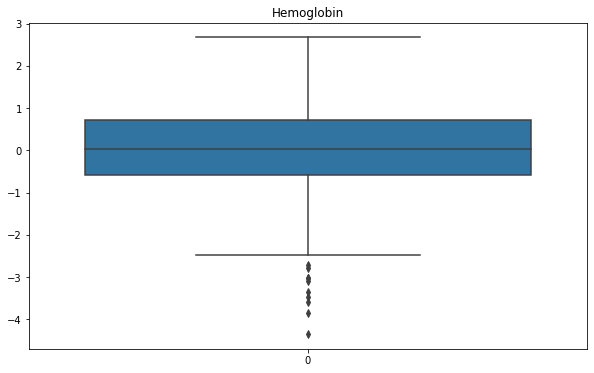

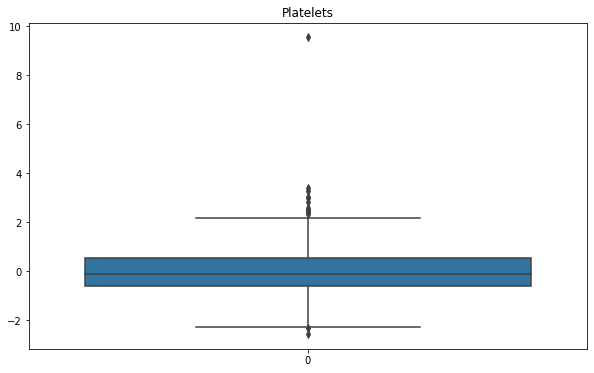

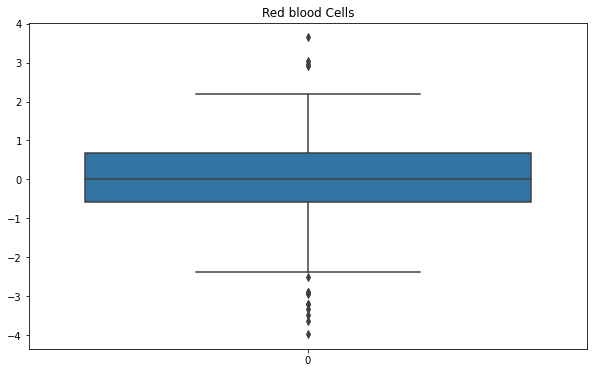

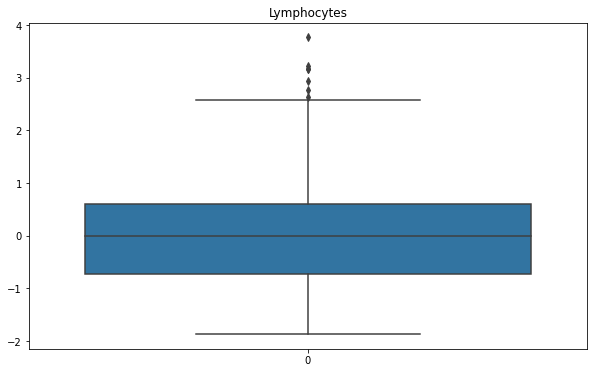

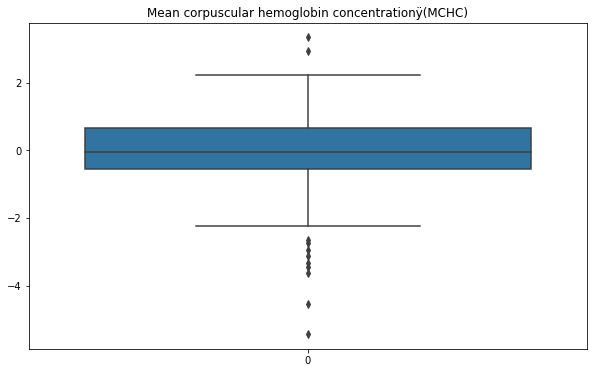

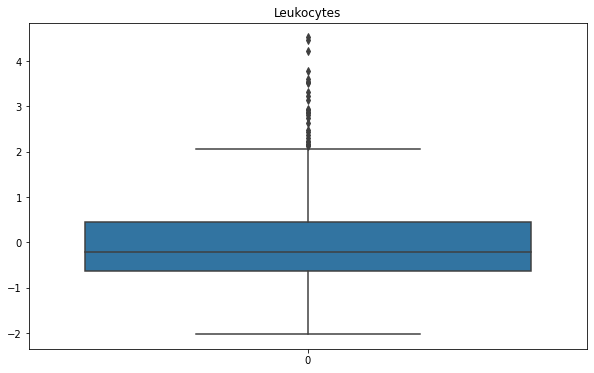

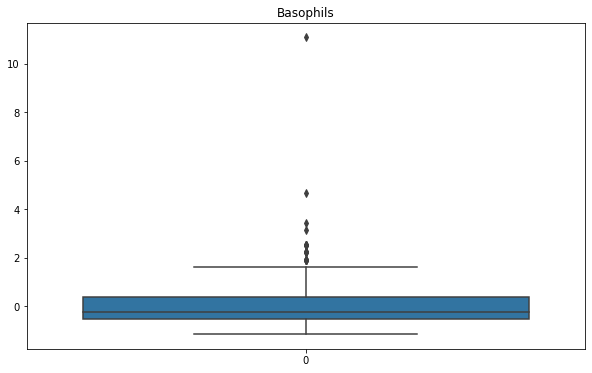

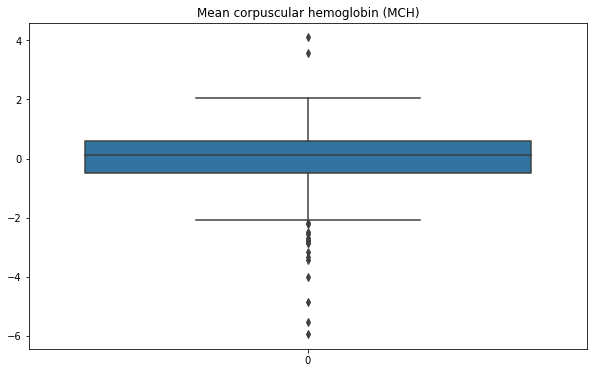

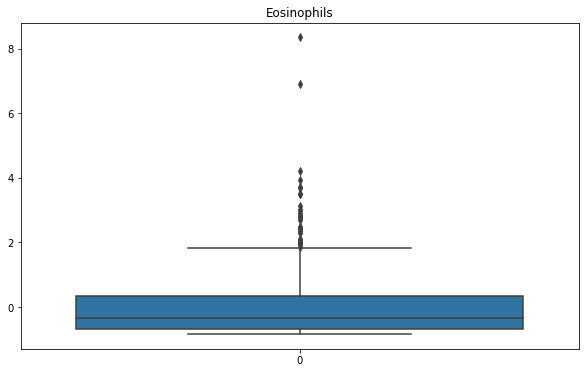

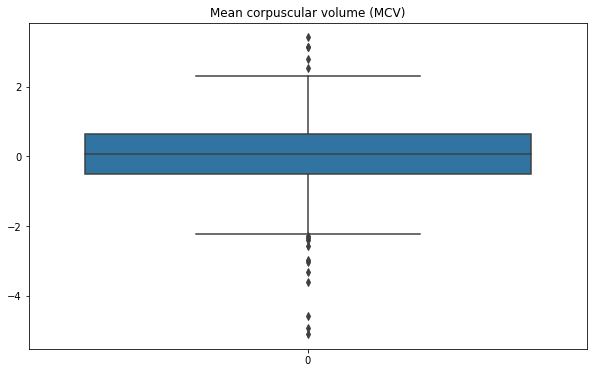

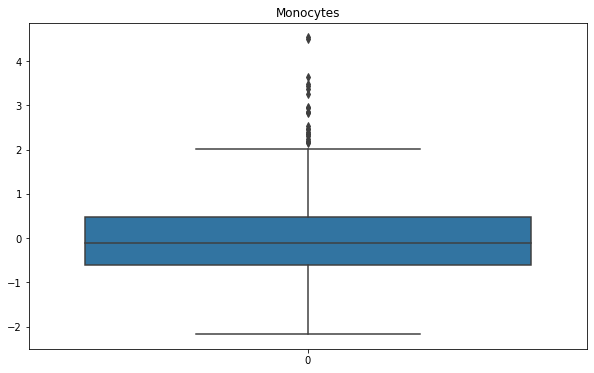

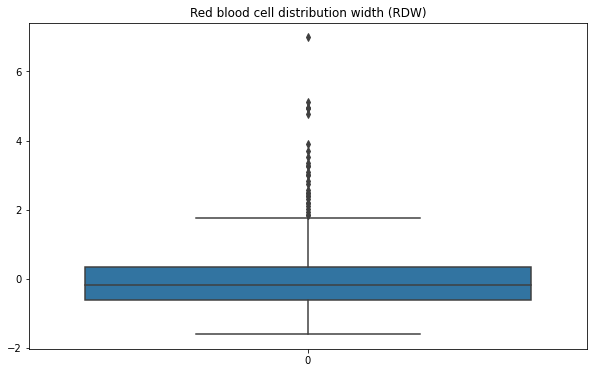

In [15]:

numeric_columns = df.select_dtypes(include=['float64'])

# Parcourir les colonnes numériques
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Définir la taille de la figure (facultatif)
    sns.boxplot(data=df[column])
    plt.title(column)  # Titre du diagramme
    plt.show()
    


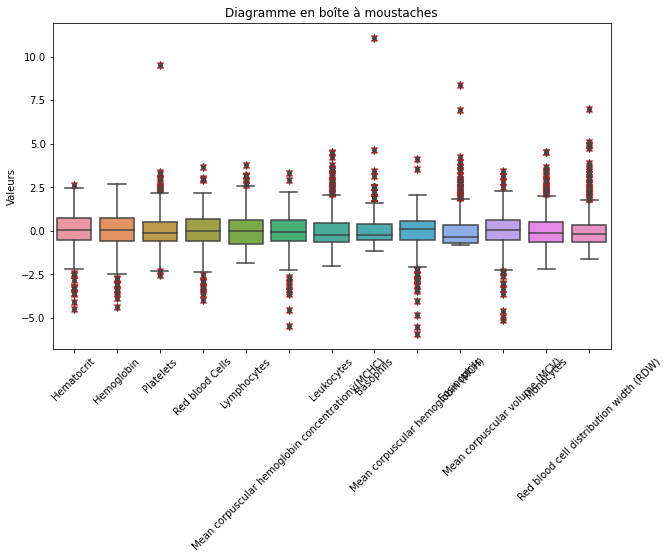

In [16]:
def detecter_aberrantes(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    seuil_inf = q1 - 1.5 * iqr
    seuil_sup = q3 + 1.5 * iqr
    return data[(data < seuil_inf) | (data > seuil_sup)]
colonnes_numeriques = df.select_dtypes(include=['float64']).columns.tolist()

# Création du diagramme en boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[colonnes_numeriques], whis=1.5)
plt.title("Diagramme en boîte à moustaches")
plt.ylabel("Valeurs")

# Détection et affichage des valeurs aberrantes
for colonne in colonnes_numeriques:
    valeurs_aberrantes = detecter_aberrantes(df[colonne])
    if not valeurs_aberrantes.empty:
        plt.scatter([colonnes_numeriques.index(colonne)] * len(valeurs_aberrantes), valeurs_aberrantes, c='red', marker='x')

plt.xticks(range(len(colonnes_numeriques)), colonnes_numeriques, rotation=45)
plt.show()

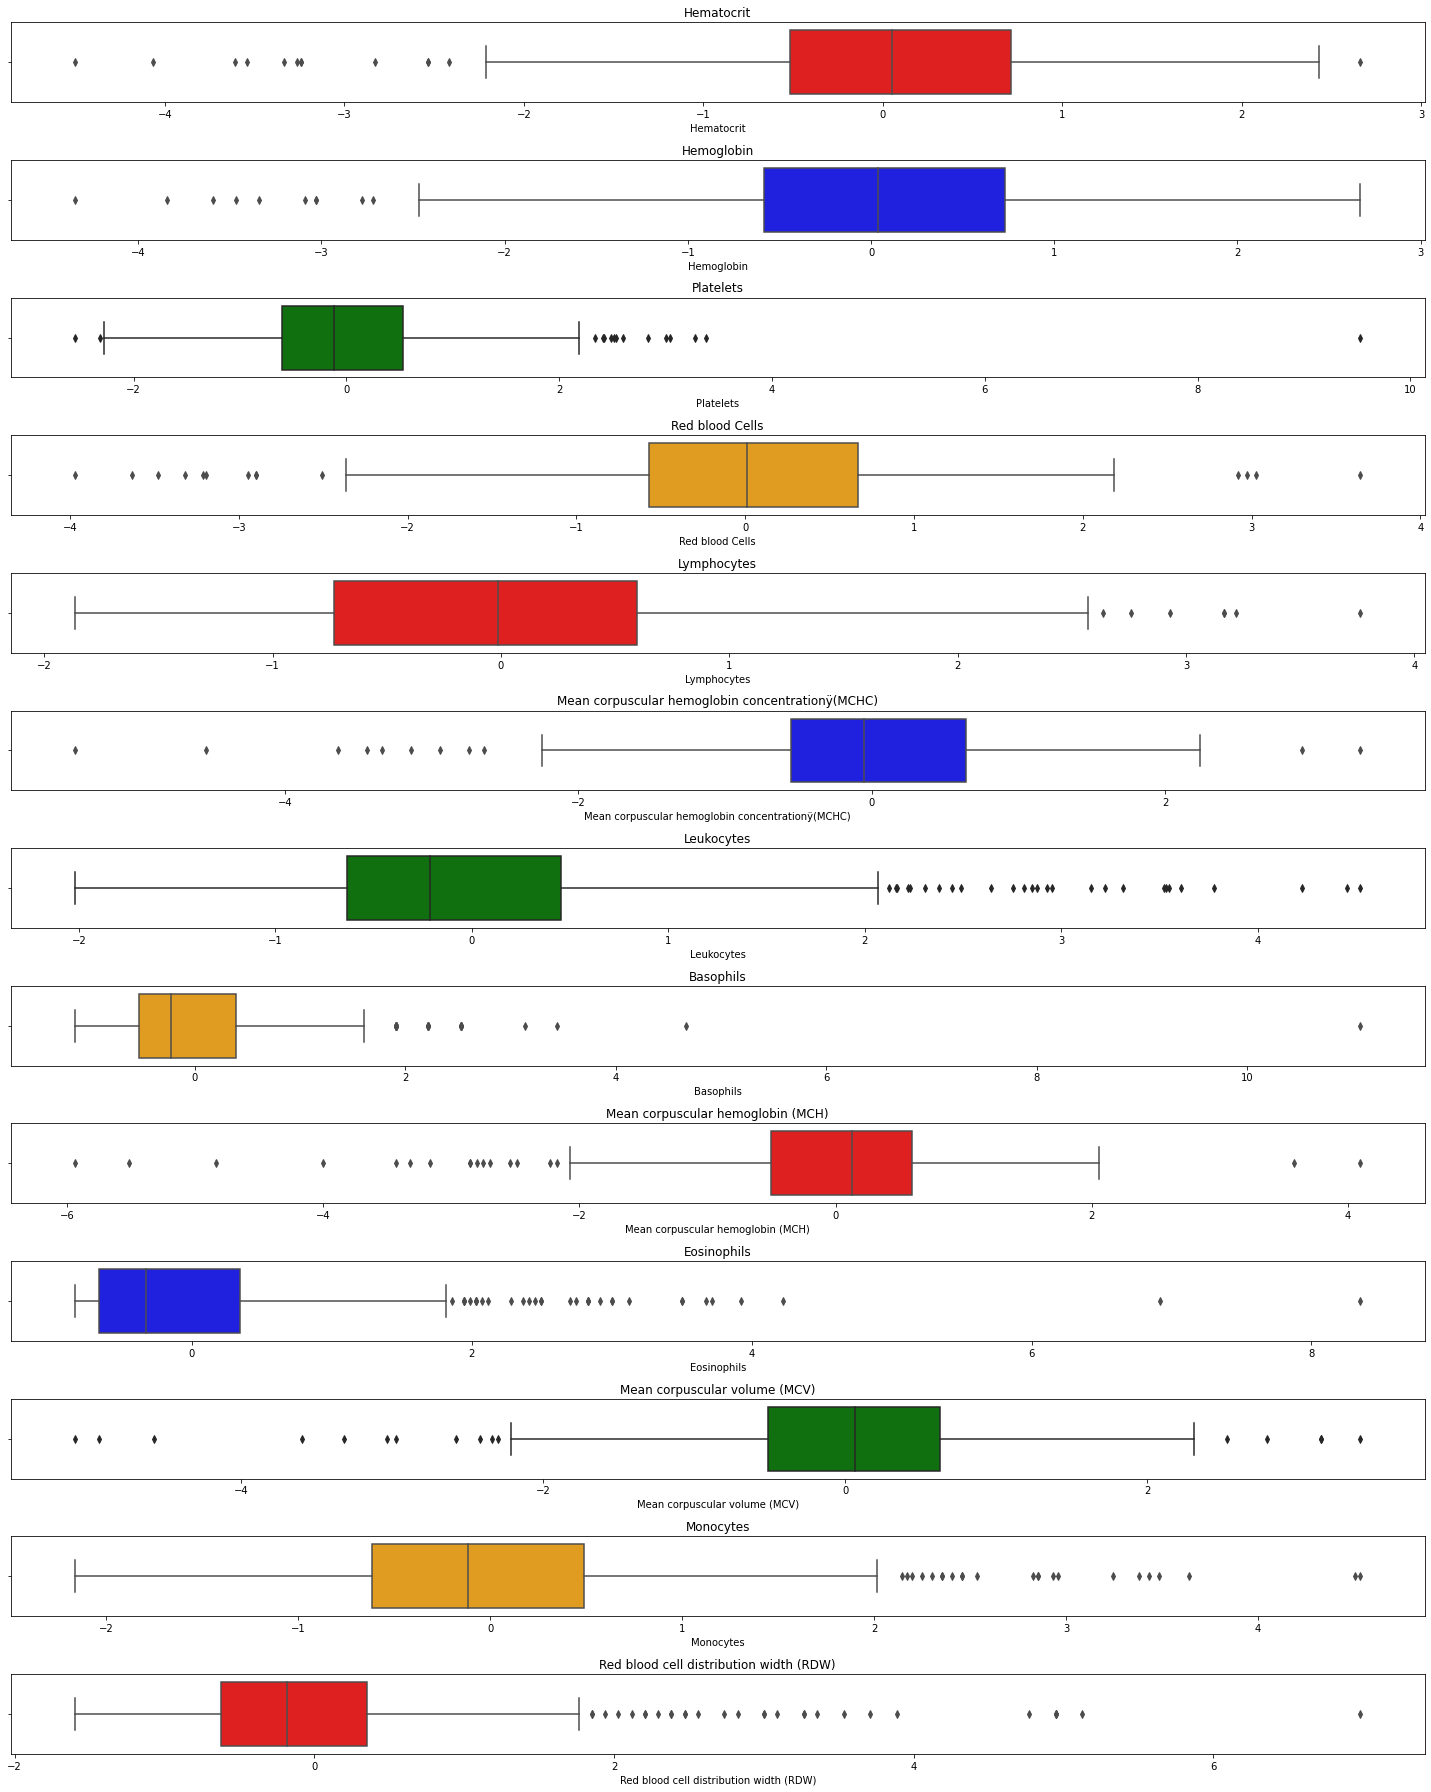

In [17]:
numeric_cols = df.select_dtypes(include=['float64'])

# Créez une liste de couleurs pour les boîtes (une couleur par variable)
colors = ['red', 'blue', 'green', 'orange']

# Créez une figure avec plusieurs sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), figsize=(20,25))

# Parcourez chaque colonne numérique et créez le diagramme de boîte à moustaches correspondant avec la couleur de remplissage des boîtes
for i, col in enumerate(numeric_cols.columns):
    # Exclure les valeurs manquantes pour la variable actuelle
    data_without_missing = numeric_cols[col].dropna()

    # Créez le diagramme de boîte à moustaches correspondant en spécifiant la couleur et en excluant les valeurs manquantes
    sns.boxplot(x=data_without_missing, ax=axes[i], color=colors[i % len(colors)])

    axes[i].set_title(col)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les diagrammes de boîte à moustaches
plt.show()







In [ ]:
# Créer le pie chart
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    category_counts = df[column].value_counts()
    plt.figure()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f"Pie Chart - {column}")
    plt.axis('equal')
    plt.show()

In [10]:
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.102004,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [27]:
df

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÿ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
 def priseencharge(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'urgence'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'réanimation'
    else:
        return 'inconnu' 

In [7]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1,
           'surveillance':0,
           'urgence':1,
            'réanimation':2,
            'inconnu':3
           }
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [11]:
def prétraitement (df):
    
    df['Decision'] = df.apply(priseencharge, axis=1)
    df= encodage(df)

      
    return df

In [12]:
df= prétraitement(df)

In [14]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Decision
0,NaN,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,NaN,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,NaN,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5640,NaN,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5641,NaN,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5642,NaN,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [15]:
df = df.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)'], axis=1)

In [16]:
df = df.drop(['SARS-Cov-2 exam result'], axis=1)

In [17]:
df

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÿ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Decision
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5640,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5641,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5642,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [18]:
import pandas as pd

def impute_with_median(df):
    df_imputed = df.copy()
    for col in df.columns:
        median = df[col].median()
        df_imputed[col].fillna(median, inplace=True)
    return df_imputed

# Exemple d'utilisation

df_imputed = impute_with_median(df)
print(df_imputed)







      Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
0                       13    0.053407    0.040316  -0.121716   
1                       17    0.236515   -0.022340  -0.517413   
2                        8    0.053407    0.040316  -0.121716   
3                        5    0.053407    0.040316  -0.121716   
4                       15    0.053407    0.040316  -0.121716   
...                    ...         ...         ...        ...   
5639                     3    0.053407    0.040316  -0.121716   
5640                    17    0.053407    0.040316  -0.121716   
5641                     4    0.053407    0.040316  -0.121716   
5642                    10    0.053407    0.040316  -0.121716   
5643                    19    0.694287    0.541564  -0.906829   

      Red blood Cells  Lymphocytes  \
0            0.013852    -0.014267   
1            0.102004     0.318366   
2            0.013852    -0.014267   
3            0.013852    -0.014267   
4            0.013852    -0.0

In [19]:
df = df_imputed

In [20]:
df

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationÿ(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Decision
0,13,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,8,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,5,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,15,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5640,17,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5641,4,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5642,10,0.053407,0.040316,-0.121716,0.013852,-0.014267,-0.054585,-0.212879,-0.223767,0.125903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [21]:
X = df.drop('Decision', axis=1)
Y = df['Decision']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

<AxesSubplot:>

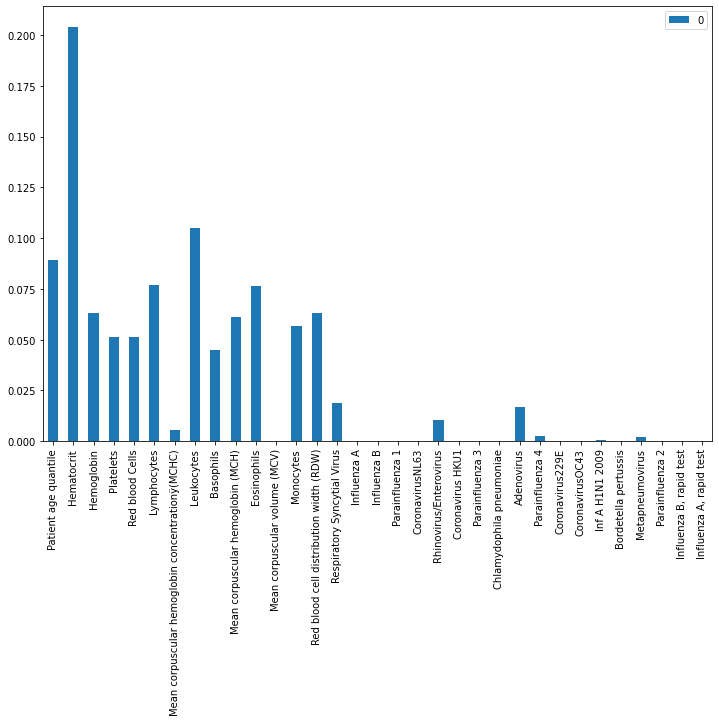

In [23]:

from sklearn.tree import DecisionTreeClassifier
modele = DecisionTreeClassifier(random_state=0)
modele.fit(X_train, Y_train)
pd.DataFrame(modele.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modele = DecisionTreeClassifier(random_state=0)
modele.fit(X_train, Y_train)
pd.DataFrame(modele.feature_importances_, index=X_train.columns).plot(figsize=(12, 8))


In [ ]:

modele = RandomForestClassifier(random_state=0)
modele.fit(X_train, Y_train)

feature_importances = modele.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.scatter(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [31]:
df_modelisation = df[["Patient age quantile","Hematocrit","Platelets","Hemoglobin","Red blood Cells", "Lymphocytes","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Monocytes","Red blood cell distribution width (RDW)","Respiratory Syncytial Virus","Adenovirus","Decision"]]

In [ ]:
# writing to Excel
Analyse_pbi= pd.ExcelWriter('data5-analyse.xlsx')

df_best.to_excel(Analyse_pbi)
  
# save the  result excel
Analyse_pbi.save()
print('data5-analyse is successfully written into Excel File')



In [29]:
# writing to Excel
df-model= pd.ExcelWriter('df-modelisation.xlsx')

df-modelisation.to_excel(df-model)
 
# save the  result excel
df-model.save()
print('Analyse_pbi is successfully written into Excel File')

SyntaxError: can't assign to operator (<ipython-input-29-2cb709ada0ab>, line 2)

In [32]:
nom_fichier = 'C:/Users/dell/Desktop/df-model.xlsx'  
df_modelisation.to_excel(nom_fichier, index=False)